In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [118]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import or_, and_
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [122]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [123]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [124]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [125]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [126]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [175]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
recent_date.date

'2017-08-23'

### Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [129]:
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [165]:
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.prcp, Measurement.date, Measurement.tobs).\
    filter(Measurement.date>=query_date).order_by(Measurement.date.desc()).distinct()

In [167]:
Precipitation = [result[0] for result in results[:10]]
Date = [result[1] for result in results[:10]]

In [173]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results[:10], columns=['Precipitation', 'Date', 'Time Of Day'])
df.set_index('Date', inplace=True)
df1 = df.dropna()
# Sort the dataframe by date
df1.sort_index()
df1.head(10)

,Precipitation,Time Of Day
Date,,
2017-08-23,0.00,81.0
2017-08-23,0.00,82.0
2017-08-23,0.08,82.0
2017-08-23,0.45,76.0
2017-08-22,0.00,82.0
2017-08-22,0.50,76.0
2017-08-21,0.00,81.0
2017-08-21,0.02,79.0
2017-08-21,0.56,76.0


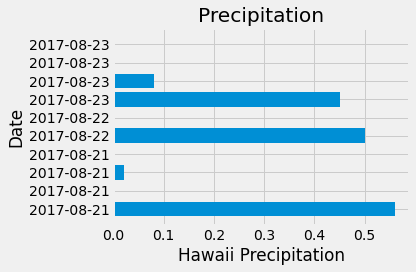

In [174]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ypos = range(1, len(df.Precipitation)+1)
ax.barh(ypos, df.Precipitation[::-1])
ax.set_xlabel("Hawaii Precipitation")
ax.set_ylabel("Date")
ax.set_yticks(ypos)
ax.set_yticklabels(Date[::-1])
ax.set_title("Precipitation")
fig.tight_layout()
plt.show()

In [60]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.describe())

       Precipitation
count       9.000000
mean        0.116667
std         0.205183
min         0.000000
25%         0.000000
50%         0.000000
75%         0.080000
max         0.500000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
year_2017 = session.query(Sharks).filter_by(year="2017").count()
print(year_2017)

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
fatal_surfing = session.query(Sharks).\
    group_by(fatal_y_n='Y'). \
    filter_by(activity = 'Surfing').count()
print(fatal_surfing)

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [176]:
# Close Session
session.close()